In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Online tile generation of multi-/hyperspectral images

In [2]:
import numpy as np
from plakakia.utils_tiling import tile_image

In [3]:
# Donload this example data from here: https://www.kaggle.com/datasets/abhijeetgo/indian-pines-hyperspectral-dataset
# and place it in the examples folder (filename: indianpinearray.npy)

In [4]:
# Load npy file
img = np.load('indianpinearray.npy')
print(f"The shape of the original image is {img.shape}. So this is a 3D array with {img.shape[-1]} channels.")
# Normalize to [0, 255] range
img = (img - img.min()) / (img.max() - img.min()) * 255

The shape of the original image is (145, 145, 200). So this is a 3D array with 200 channels.


The shape of the 3-band image is (145, 145, 3) (bands: [ 72  24 129])


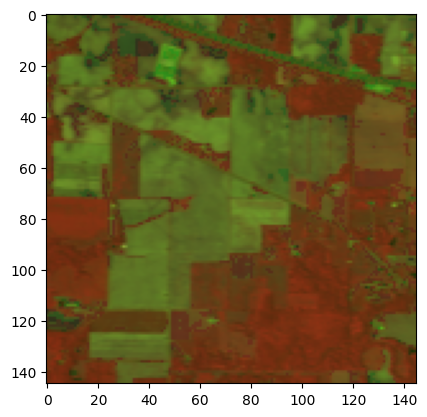

In [5]:
# Create a new image made of 3 random bands
random_bands = np.random.randint(0, img.shape[2], 3)
img_3bands = img[:, :, random_bands]
print(f"The shape of the 3-band image is {img_3bands.shape} (bands: {random_bands})")
# Visualize the image
import matplotlib.pyplot as plt
plt.imshow(img_3bands.astype(np.uint8));

In [6]:
# Tiling the original image
tiles, coordinates = tile_image(img, tile_size=30, step_size=30)
print(f"The shape of the tiles array is {tiles.shape}")

The shape of the tiles array is (16, 30, 30, 200)


In [7]:
# Tiling the 3-band image
tiles_3bands, coordinates_3bands = tile_image(img_3bands, tile_size=30, step_size=30)
print(f"The shape of the tiles array is {tiles_3bands.shape}")

The shape of the tiles array is (16, 30, 30, 3)


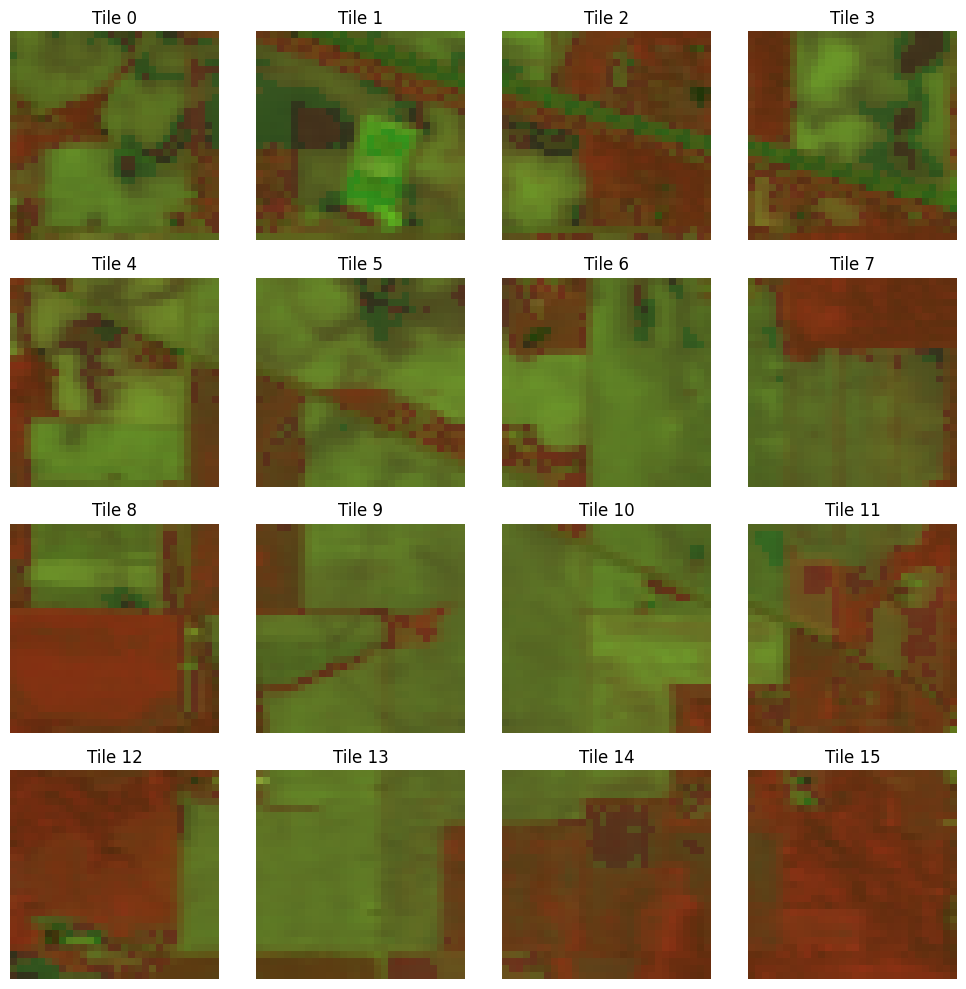

In [8]:
# Visualize the 16 tiles of the 3-band image
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(tiles_3bands[i].astype(np.uint8))
    ax.set_title(f"Tile {i}")
    ax.axis('off')
plt.tight_layout()